In [19]:
import pandas as pd
encodings=['utf-8','latin1','ISO-8850-1','cp1252']

file_path='/content/spam.csv'

for encoding in encodings:
  try:
    df = pd.read_csv(file_path, encoding=encoding)
    print(f"File successfully read with encoding: {encoding}")
    break
  except UnicodeDecodeError:
    print(f"Failed to read with encoding: {encoding}")
    continue
if 'df' in locals():
   print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [20]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3436,ham,Then what about further plan?,NaN,NaN,NaN
3028,ham,What is your record for one night? :),NaN,NaN,NaN
4029,ham,"Cool, I'll text you in a few",NaN,NaN,NaN
4694,spam,URGENT! Your Mobile No 07808726822 was awarded...,NaN,NaN,NaN
3176,ham,In meeting da. I will call you,NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [22]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True,errors='ignore')
df.sample(5)

,v1,v2
2005,ham,Can't take any major roles in community outrea...
1293,ham,Happy birthday... May all ur dreams come true...
702,ham,What is important is that you prevent dehydrat...
3753,spam,Bloomberg -Message center +447797706009 Why wa...
2320,ham,This pain couldn't have come at a worse time.


In [24]:
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True,errors='ignore')
df.sample(5)

,target,text
647,spam,PRIVATE! Your 2003 Account Statement for shows...
1192,ham,I was up all night too worrying about this app...
59,ham,Yes..gauti and sehwag out of odi series.
3960,ham,Your dad is back in ph?
258,spam,We tried to contact you re your reply to our o...


In [25]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [26]:
df['target']=encode.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
df.duplicated().sum()

403

In [29]:
df=df.drop_duplicates(keep='first')

In [30]:
df.duplicated().sum()

0

In [31]:
df.shape

(5169, 2)

In [32]:
#data exploration
df.head()
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

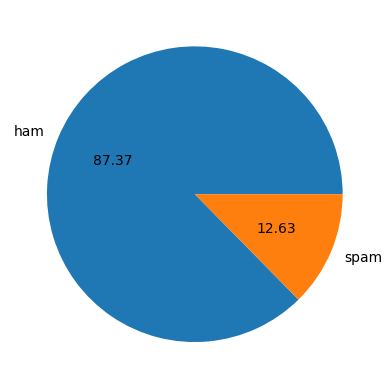

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [34]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df.head()

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [37]:
df['num_characters']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [38]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,2,2
1,0,Ok lar... Joking wif u oni...,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,2
3,0,U dun say so early hor... U c already then say...,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,1


In [39]:
df[['num_words','num_sentences','num_characters']].describe()

,num_words,num_sentences,num_characters
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,1.965564
std,13.324758,1.448541,1.448541
min,1.000000,1.000000,1.000000
25%,9.000000,1.000000,1.000000
50%,15.000000,1.000000,1.000000
75%,26.000000,2.000000,2.000000
max,220.000000,38.000000,38.000000


In [40]:
df[df['target']==0][['num_words','num_sentences','num_characters']].describe()

,num_words,num_sentences,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,1.820195
std,13.493970,1.383657,1.383657
min,1.000000,1.000000,1.000000
25%,8.000000,1.000000,1.000000
50%,13.000000,1.000000,1.000000
75%,22.000000,2.000000,2.000000
max,220.000000,38.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

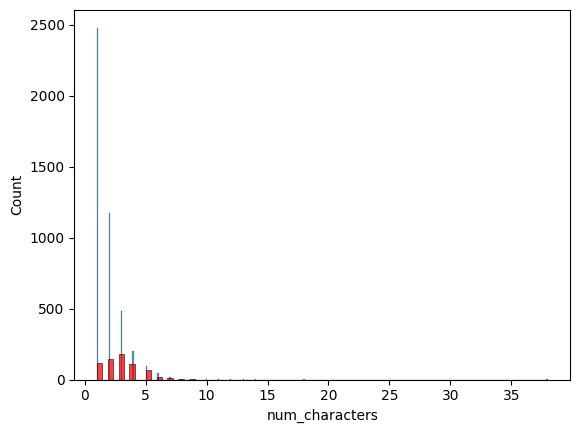

In [41]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

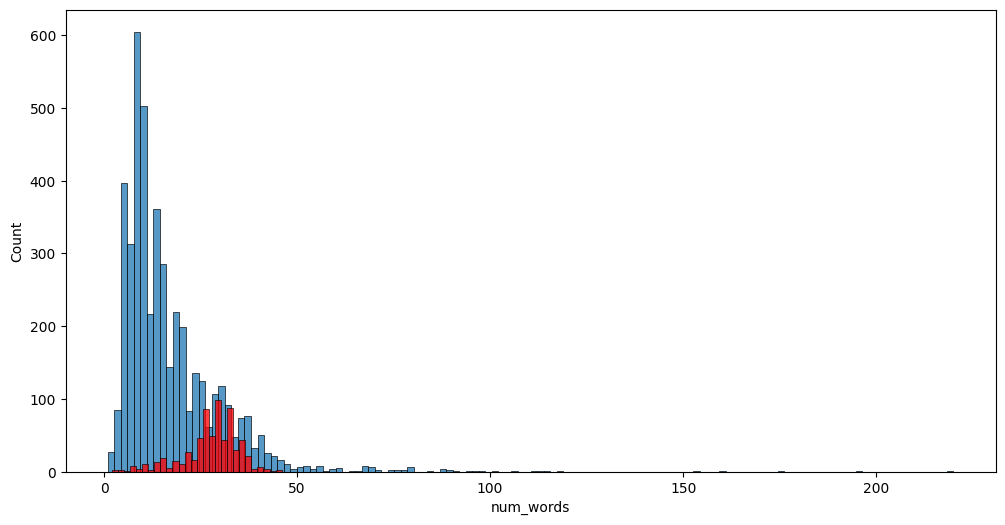

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

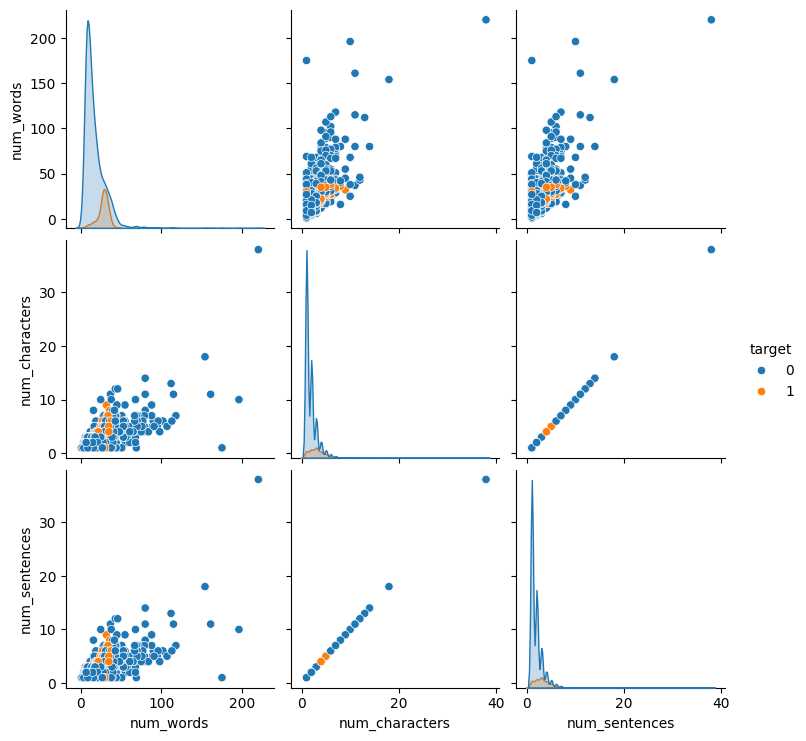

In [43]:
sns.pairplot(df,hue='target')

In [44]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()


from nltk.corpus import stopwords

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  # retaining only string and alphanumeric characters

  li = []
  for i in text:
    if i.isalnum():
      li.append(i)

  text = li[:]
  li.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      li.append(i)

  text = li[:]
  li.clear()

  for i in text:
    li.append(ps.stem(i))

  return " ".join(li)


transform_text('hi how ARE YOU Nikhil %% ^^ , did you like the love language ?')


print(transform_text)





<function transform_text at 0x7eb672a8f520>


In [47]:
df.head()

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,2,2
1,0,Ok lar... Joking wif u oni...,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,2
3,0,U dun say so early hor... U c already then say...,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,1


In [49]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('eating')

'eat'

In [52]:
df['transform_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_words,num_characters,num_sentences,transformed_text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,1,nah think goe usf live around though,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

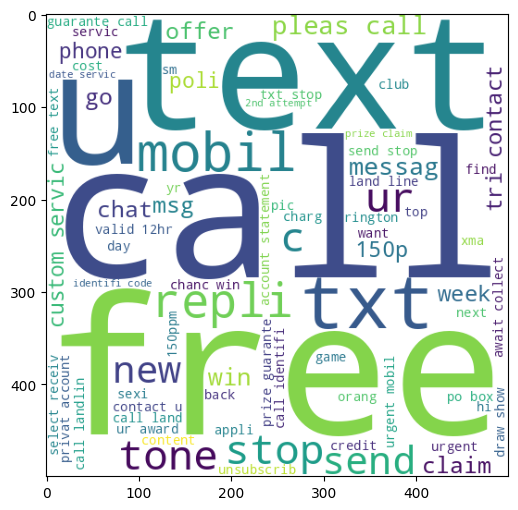

In [54]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

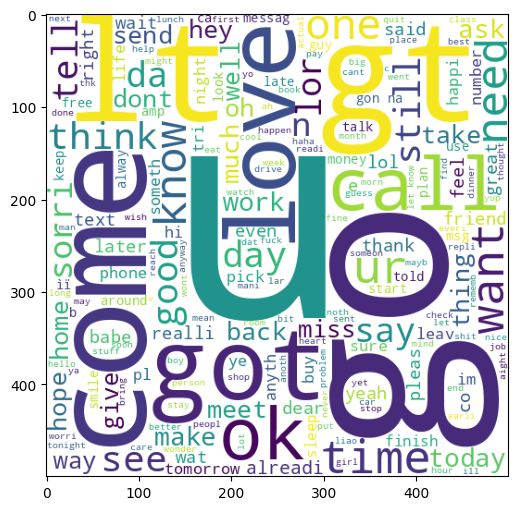

In [55]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_words,num_characters,num_sentences,transformed_text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,1,nah think goe usf live around though,nah think goe usf live around though


In [60]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

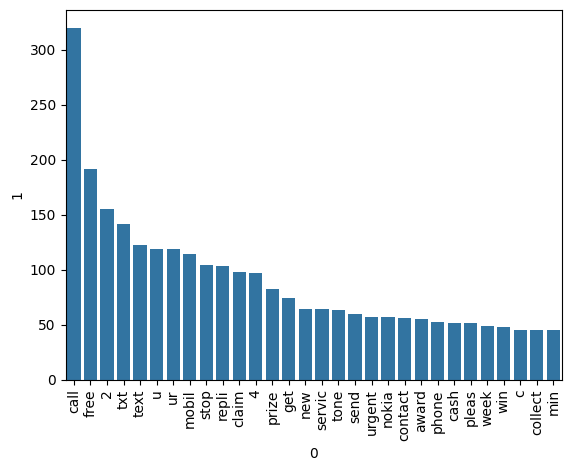

In [65]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [67]:
len(ham_corpus)

35404

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

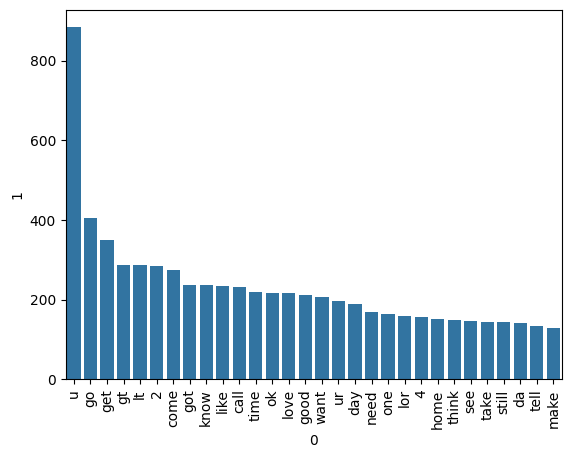

In [68]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [69]:
df.head()

,target,text,num_words,num_characters,num_sentences,transformed_text,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,1,nah think goe usf live around though,nah think goe usf live around though


In [71]:
#building a model
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [72]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [73]:
x.shape

(5169, 3000)

In [74]:
y=df['target'].values

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [83]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [84]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [85]:
!pip install xgboost

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
Irc=LogisticRegression (solver='liblinear', penalty='11')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [90]:
clfs = {
 'SVC': svc,
 'KN': knc,
 'NB': mnb,
 'DT': dtc,
 'RF': rfc,
 'AdaBoost': abc,
 'BgC': bc,
 'ETC': etc,
 'GBDT':gbdt,
 'xgb':xgb
}

In [94]:
def train_classifier(clf,x_train,y_train, X_test,y_test):
 clf.fit(X_train,y_train)
 y_pred = clf.predict(X_test)
 accuracy = accuracy_score(y_test,y_pred)
 precision = precision_score(y_test,y_pred)
 return accuracy,precision

In [95]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [97]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("for ",name)
  print("Accuracy",current_accuracy)
  print("Precision",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for  SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
for  KN
Accuracy 0.9052224371373307
Precision 1.0
for  NB
Accuracy 0.9709864603481625
Precision 1.0
for  DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283
for  RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
for  AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
for  BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
for  ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
for  GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
for  xgb
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [99]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [101]:
performance_df1=pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.960348
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.929400


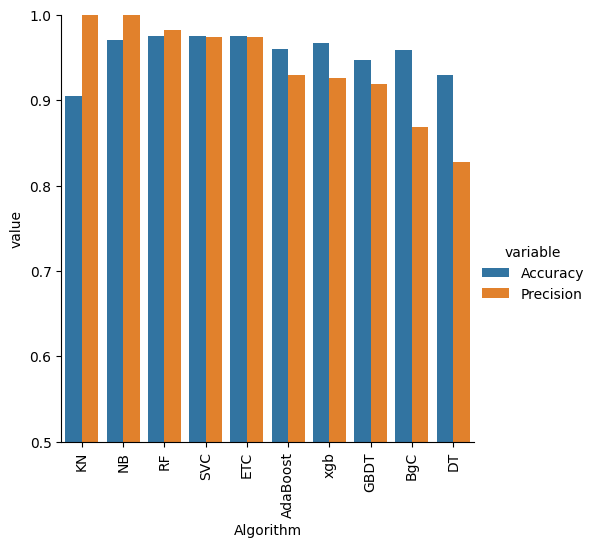

In [102]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [103]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [104]:
new_df=performance_df.merge(temp_df,on='Algorithm')
new_df_scaled=new_df.merge(temp_df,on='Algorithm')
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [105]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_scaling,Precision_scaling
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [106]:
svc=SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [110]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [111]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [113]:
estimator=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier

In [124]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimator,final_estimator=final_estimator)

In [125]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
clf=StackingClassifier(estimators=estimator,final_estimator=RandomForestClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [127]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [132]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train=[0, 1, 0]

tfidf=TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb = mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)